In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ax
import seaborn as sns
plt.style.use('ggplot')

r_fname = 'healthgrades_physicians_GI_NY_full_raw.csv'
fname = 'healthgrades_physicians_GI_NY_full.csv'
# Remove blank lines in raw csv file (scrapy bug for windows)
raw_data = pd.read_csv(r_fname)

# do not write index column
raw_data.to_csv(fname, index = False)  

# read in fixed csv file
data = pd.read_csv(fname) 

In [156]:
data.shape

(947, 20)

In [157]:
data.columns

Index(['addr_street', 'age', 'city', 'detailed_url', 'doc_rating', 'featured',
       'gender', 'hcp_id', 'hosp_fellow', 'hosp_md', 'hosp_res', 'name',
       'num_ins', 'num_reviews', 'practice_addr', 'practice_name', 'rating',
       'staff_rating', 'state', 'zipcode'],
      dtype='object')

In [158]:
for field in data.columns:
    print(field, type(data.loc[0,field]))

addr_street <class 'str'>
age <class 'numpy.float64'>
city <class 'str'>
detailed_url <class 'str'>
doc_rating <class 'str'>
featured <class 'numpy.int64'>
gender <class 'str'>
hcp_id <class 'str'>
hosp_fellow <class 'str'>
hosp_md <class 'str'>
hosp_res <class 'str'>
name <class 'str'>
num_ins <class 'numpy.float64'>
num_reviews <class 'numpy.int64'>
practice_addr <class 'str'>
practice_name <class 'str'>
rating <class 'numpy.float64'>
staff_rating <class 'str'>
state <class 'str'>
zipcode <class 'numpy.int64'>


In [159]:
# check for duplicates based on hcp_id, there shouldn't be any
np.sum(data.duplicated(subset = ['hcp_id']))

0

In [160]:
# def fix_dtype(a):
#     '''
#     change some of data fields that should be integers but were read in as floats due to NaN values
#     a is a panda series
#     '''
#     return a.fillna(-1).astype(int).astype(str).replace('-1',np.nan)

# print(data['num_ins'].dtype)
# print(data['age'].dtype)
# data['num_ins'] = fix_dtype(data['num_ins'])
# data['age'] = fix_dtype(data['age'])
# print(data['num_ins'].dtype)
# print(data['age'].dtype)

In [161]:
# change zipcode to 5 digit string    
if data['zipcode'].dtype == 'int64':
    data['zipcode'] = data['zipcode'].apply(lambda x: '{0:05d}'.format(x))
data['zipcode'].sample(10)

336    10029
101    10029
125    07302
116    10013
297    10029
376    10032
226    10029
402    10003
878    10019
744    07024
Name: zipcode, dtype: object

In [162]:
pd.set_option('display.max_columns', 50)
data.head(5)
data.sample(5)
data.tail(5)

,addr_street,age,city,detailed_url,doc_rating,featured,gender,hcp_id,hosp_fellow,hosp_md,hosp_res,name,num_ins,num_reviews,practice_addr,practice_name,rating,staff_rating,state,zipcode
942,161 Avenue of the Americas Fl 13,NaN,New York,/physician/dr-ilan-weisberg-y2yv8,2.0|2.0|2.0|2.0,0,Male,dr-ilan-weisberg-y2yv8,NaN,NaN,NaN,"Dr. Ilan Weisberg, MD",NaN,78,"161 Avenue of the Americas Fl 13, New York, NY...",NaN,2.0,2.0|2.0|2.0,NY,10013
943,2355 Ocean Ave Apt 1P,67.0,Brooklyn,/physician/dr-bernard-yonk-xmqsw,5.0|5.0|5.0|4.5,0,Male,dr-bernard-yonk-xmqsw,NaN,"Universidad Autonoma De Guadalajara, Facultad ...",Kings Co Hospital Downstate Med,"Dr. Bernard Yonk, MD",NaN,5,"2355 Ocean Ave Apt 1P, Brooklyn, NY, 11229",Bernard B Yonk MD,5.0,3.5|4.0|4.0,NY,11229
944,708 W 171st St Apt A,79.0,New York,/physician/dr-rafaeel-ortiz-2td29,5.0|5.0|4.0|4.0,0,Male,dr-rafaeel-ortiz-2td29,Lenox Hill Hospital,U Santo Domingo,Mt Vernon Hosp,"Dr. Rafael Ortiz, MD",NaN,1,"708 W 171st St Apt A, New York, NY, 10032","RAFAEL A ORTIZ, M.D.",5.0,5.0|4.0|5.0,NY,10032
945,1315 York Ave Fl 1,NaN,New York,/physician/dr-ravi-sharaf-388ny,5.0|5.0|5.0|5.0,0,Male,dr-ravi-sharaf-388ny,Stanford University Hospital and Clinic,New York University School Of Medicine,Columbia University College Of Physicians & Su...,"Dr. Ravi Sharaf, MD",NaN,2,"1315 York Ave Fl 1, New York, NY, 10021","Weill Cornell Medicine, Jay Monahan Center for...",5.0,5.0|5.0|5.0,NY,10021
946,311 E 79th St Ste 2A,49.0,New York,/physician/dr-brian-landzberg-xqwfb,3.5|3.5|3.5|3.5,0,Male,dr-brian-landzberg-xqwfb,Ny Presby Hosp-Cornell U Med Coll,"Yeshiva U, College Of Medicine",New York Presbyterian Hospital-New York Weill ...,"Dr. Brian Landzberg, MD",NaN,17,"311 E 79th St Ste 2A, New York, NY, 10075",NaN,3.5,3.5|4.0|4.0,NY,10075


In [163]:
# count % of missing values by column
mv_cols = pd.DataFrame(data = np.sum(data.isnull(), axis = 0) / data.shape[0], columns = ['pct_mv'] )
print(mv_cols.to_string(formatters = {'pct_mv': '{:.0%}'.format}))

              pct_mv
addr_street       0%
age              22%
city              0%
detailed_url      0%
doc_rating       28%
featured          0%
gender            1%
hcp_id            0%
hosp_fellow      41%
hosp_md          25%
hosp_res         33%
name              0%
num_ins          93%
num_reviews       0%
practice_addr     0%
practice_name    12%
rating           28%
staff_rating     29%
state             0%
zipcode           0%


In [101]:
type(data['doc_rating'][1])
data['doc_rating'].index

RangeIndex(start=0, stop=947, step=1)

In [102]:
# convert detailed doc_rating and staff_rating from string to float
def split_score(data_series,n):
    y = []
    for x in data_series:
        if pd.isna(x) == False:
            y.append([float(xi) for xi in x.split('|')])
        else:
            y.append([x]*n)
    return y

# doc_trust: Trustworthiness
# doc_explain: Explains condition(s) well
# doc_answer: Answers questions
# doc_time: Time well spent
doc_scores = pd.DataFrame(split_score(data['doc_rating'],4),columns = ['doc_trust','doc_explain','doc_answer','doc_time'])

# doc_scores.head(5)
# print(data['doc_rating'].head(5))
# print(doc_scores.head(5))

# print(data['doc_rating'].tail(5))
# print(doc_scores.tail(5))


In [103]:
# convert detailed staff_rating from string to float
staff_scores = pd.DataFrame(split_score(data['staff_rating'],3),columns = ['staff_scheduling','staff_env','staff_friendly'])
# staff_scores.head(5)
# print(data['staff_rating'].head(5))
# print(staff_scores.head(5))
# print(data['staff_rating'].tail(5))
# print(staff_scores.tail(5))

In [104]:
# add the detailed rating columns to dataframe
newdata = pd.concat([data, doc_scores, staff_scores], axis = 1)
newdata.loc[:,['doc_rating','doc_trust','doc_explain','doc_answer','doc_time']].head(10)

,doc_rating,doc_trust,doc_explain,doc_answer,doc_time
0,5.0|5.0|5.0|4.5,5.0,5.0,5.0,4.5
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,5.0|5.0|5.0|5.0,5.0,5.0,5.0,5.0


In [113]:
# create indicator for whether the doctor has been reviewed or not
newdata['has_review'] = 1
newdata.loc[ newdata['num_reviews'] == 0, 'has_review'] = 0
newdata.loc[:,['num_reviews','has_review']].sample(10)

,num_reviews,has_review
706,12,1
790,2,1
310,0,0
606,7,1
331,1,1
215,13,1
39,5,1
660,5,1
226,0,0
942,78,1


Age: 
- Distribution of physicians by age
- Create age groups

Gender:
- count by gender

Number of reviews:
- distribution
- Create group based on num-reviews 
(indication of a mix of patient case load and e-marketing awareness of the provider?

Age vs number of reviews:
- scatterplot
- based on groups

Number of review distribution by gender

Look up: How are the reviews created? 

Distribution of review scores among those doctors with at least x reviews
- overall
- by gender
- by age group

Distribution of rating grouped by the number of reviews

Scatterplots of 3 types of ratings

Top doctors based on both num of reviews and rating
- Top institution from which they were trained? 

In [114]:
newdata.columns

Index(['addr_street', 'age', 'city', 'detailed_url', 'doc_rating', 'featured',
       'gender', 'hcp_id', 'hosp_fellow', 'hosp_md', 'hosp_res', 'name',
       'num_ins', 'num_reviews', 'practice_addr', 'practice_name', 'rating',
       'staff_rating', 'state', 'zipcode', 'doc_trust', 'doc_explain',
       'doc_answer', 'doc_time', 'staff_scheduling', 'staff_env',
       'staff_friendly', 'has_review'],
      dtype='object')

In [115]:
newdata.describe()

,age,featured,num_ins,num_reviews,rating,doc_trust,doc_explain,doc_answer,doc_time,staff_scheduling,staff_env,staff_friendly,has_review
count,737.000000,947.000000,62.000000,947.000000,681.000000,680.000000,680.000000,680.000000,680.000000,677.000000,677.000000,677.000000,947.000000
mean,58.701493,0.003168,16.241935,7.357973,4.070485,4.160294,4.183824,4.168382,4.183088,4.121123,4.198671,4.111521,0.719113
std,13.457276,0.056225,7.508870,11.604459,0.932357,0.880594,0.878077,0.893826,0.868323,0.825865,0.773573,0.855136,0.449670
min,29.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,48.000000,0.000000,13.000000,0.000000,3.500000,3.500000,3.500000,3.500000,3.875000,3.500000,4.000000,3.500000,0.000000
50%,59.000000,0.000000,16.000000,4.000000,4.000000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,1.000000
75%,68.000000,0.000000,17.750000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,1.000000
max,98.000000,1.000000,41.000000,158.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [173]:
# 681 (72%) doctors have at least one review 
subdata = newdata.loc[ newdata['has_review'] == 1 ]
subdata.num_reviews.describe()

count    681.000000
mean      10.232012
std       12.565437
min        1.000000
25%        3.000000
50%        7.000000
75%       13.000000
max      158.000000
Name: num_reviews, dtype: float64

Text(0.5,1,'Histogram of number of review for New York Metro Gastroenterologists')

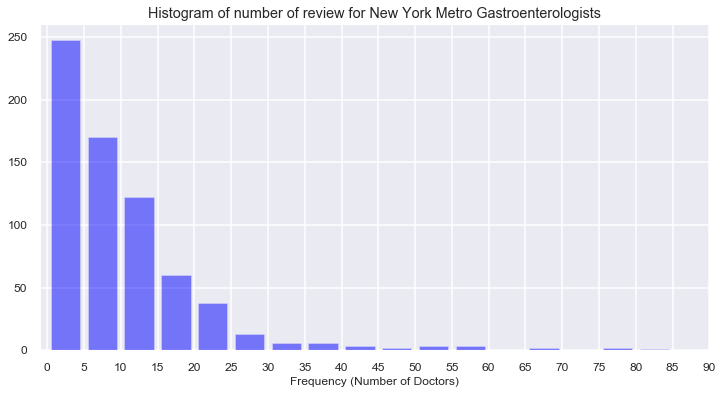

In [230]:
# overall distribution of the number of reviews among doctors with at least one review
# from matplotlib import ax
bstep = 5
bmax = int(round(subdata.num_reviews.max()/bstep)*bstep)
plt.figure(figsize=(12,6))
plt.hist(subdata.num_reviews.dropna(), bins = range(0,bmax,bstep), color = "blue", alpha = 0.5, rwidth = 0.8)
plt.xticks(np.arange(-bstep*2,bmax+2*bstep,bstep), fontsize = 12)
plt.yticks(fontsize = 12)    
plt.xlim([-1,90])
plt.xlabel('Number of reviews')
plt.xlabel('Frequency (Number of Doctors)')
plt.title('Histogram of number of review for New York Metro Gastroenterologists')

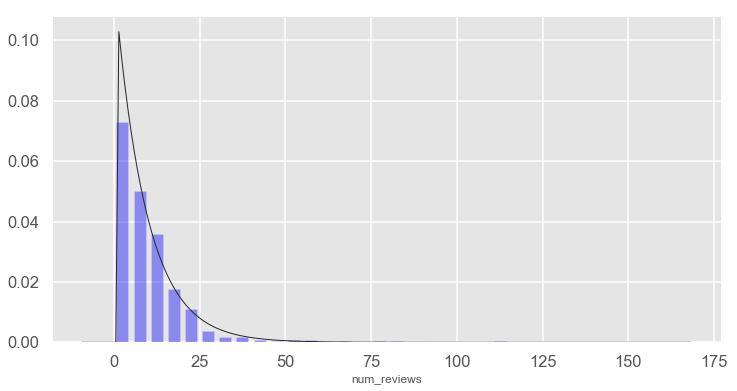

In [214]:
# seaborn version of the distribution plot
import seaborn as sns
from scipy import stats
bstep = 5
bmax = int(round(subdata.num_reviews.max()/bstep)*bstep)
plt.figure(figsize=(12,6))
sns.distplot(subdata.num_reviews.dropna(),bins = range(0,bmax,bstep), color = "blue", \
              fit = stats.expon, kde=False, hist_kws={'rwidth':0.7}, fit_kws = {'lw':1})

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

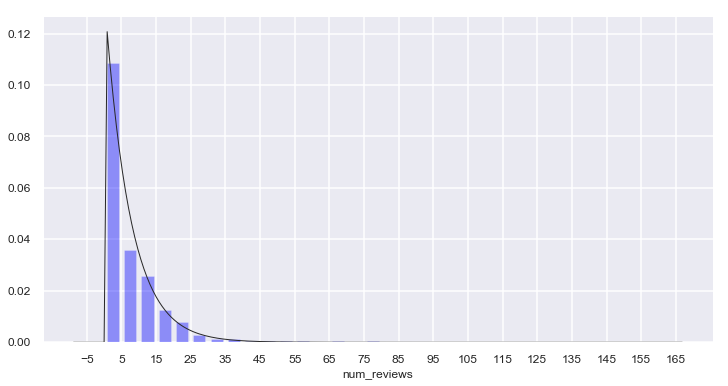

In [226]:
# seaborn version of the distribution plot
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")
bstep = 5
bmax = int(round(newdata.num_reviews.max()/bstep)*bstep)
plt.figure(figsize=(12,6))
sns.distplot(newdata.num_reviews.dropna(),bins = range(0,bmax,bstep), color = "blue", \
              fit = stats.expon, kde=False, hist_kws={'rwidth':0.7}, fit_kws = {'lw':1})
plt.xticks(np.arange(-bstep,bmax+2*bstep,bstep*2), fontsize = 12)
plt.yticks(fontsize = 12) 
#plt.xlim([0,60])

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

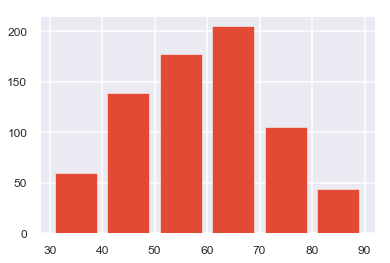

In [235]:
plt.hist(data.age.dropna(), rwidth = 0.8, bins = range(30,100,10))
plt.xticks(range(30,100,10), fontsize = 12)
plt.yticks(fontsize = 12) 

In [139]:
subdata.head()

,addr_street,age,city,detailed_url,featured,hcp_id,name,num_ins,num_reviews,practice_addr,practice_name,state,zipcode
26,903 Park Ave Fl 1,63.0,New York,/physician/dr-susan-lucak-2byyx,0,dr-susan-lucak-2byyx,"Dr. Susan Lucak, MD",NaN,16,"903 Park Ave Fl 1, New York, NY, 10075","Susan Lucak, MD",NY,10075
29,78 Todt Hill Rd Ste 203,68.0,Staten Island,/physician/dr-richard-fazio-ys6qf,0,dr-richard-fazio-ys6qf,"Dr. Richard Fazio, MD",NaN,15,"78 Todt Hill Rd Ste 203, Staten Island, NY, 10314",Richard A Fazio MD,NY,10314
30,928 Broadway Ste 400,40.0,New York,/physician/dr-alexandra-shustina-g9hsp,0,dr-alexandra-shustina-g9hsp,"Dr. Alexandra Shustina, DO",NaN,18,"928 Broadway Ste 400, New York, NY, 10010",Manhattan Integrative Gastroenterology,NY,10010
40,2569 Ocean Ave # 3,52.0,Brooklyn,/physician/dr-yuriy-pertsovsky-xfktn,0,dr-yuriy-pertsovsky-xfktn,"Dr. Yuriy Pertsovsky, MD",NaN,29,"2569 Ocean Ave # 3, Brooklyn, NY, 11229",Lifelong Medical,NY,11229
41,35 E 35th St Rm 200,67.0,New York,/physician/dr-michael-klein-3f9by,0,dr-michael-klein-3f9by,"Dr. Michael Klein, MD",NaN,22,"35 E 35th St Rm 200, New York, NY, 10016",Park Avenue Gastroenterology,NY,10016


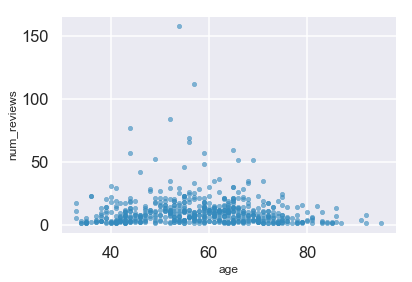

In [236]:
subdata.plot(kind='scatter',x='age', y='num_reviews', alpha = 0.6)

In [239]:
newdata.columns

Index(['addr_street', 'age', 'city', 'detailed_url', 'doc_rating', 'featured',
       'gender', 'hcp_id', 'hosp_fellow', 'hosp_md', 'hosp_res', 'name',
       'num_ins', 'num_reviews', 'practice_addr', 'practice_name', 'rating',
       'staff_rating', 'state', 'zipcode', 'doc_trust', 'doc_explain',
       'doc_answer', 'doc_time', 'staff_scheduling', 'staff_env',
       'staff_friendly', 'has_review'],
      dtype='object')

In [242]:
numdata = newdata.loc[:,['age', 'doc_trust', 'doc_explain', 'doc_answer','doc_time',\
               'staff_scheduling','staff_env', 'staff_friendly', 'num_reviews', 'rating']]
numdata.corr(min_periods = 50)


,age,doc_trust,doc_explain,doc_answer,doc_time,staff_scheduling,staff_env,staff_friendly,num_reviews,rating
age,1.000000,-0.015160,-0.034877,-0.028455,-0.036339,-0.028661,-0.074716,-0.050626,-0.068184,-0.025438
doc_trust,-0.015160,1.000000,0.955603,0.958754,0.924600,0.758987,0.769533,0.766615,-0.034031,0.947436
doc_explain,-0.034877,0.955603,1.000000,0.966299,0.954429,0.743267,0.763101,0.756003,-0.029382,0.932121
doc_answer,-0.028455,0.958754,0.966299,1.000000,0.944580,0.753324,0.754716,0.746780,-0.036392,0.937126
doc_time,-0.036339,0.924600,0.954429,0.944580,1.000000,0.739957,0.747644,0.768806,-0.058909,0.911966
staff_scheduling,-0.028661,0.758987,0.743267,0.753324,0.739957,1.000000,0.809169,0.812940,-0.008292,0.780050
staff_env,-0.074716,0.769533,0.763101,0.754716,0.747644,0.809169,1.000000,0.832438,-0.011875,0.773048
staff_friendly,-0.050626,0.766615,0.756003,0.746780,0.768806,0.812940,0.832438,1.000000,-0.006517,0.784934
num_reviews,-0.068184,-0.034031,-0.029382,-0.036392,-0.058909,-0.008292,-0.011875,-0.006517,1.000000,-0.030143
rating,-0.025438,0.947436,0.932121,0.937126,0.911966,0.780050,0.773048,0.784934,-0.030143,1.000000


In [243]:
scores = newdata.loc[:,['doc_trust', 'doc_explain', 'doc_answer','doc_time',\
               'staff_scheduling','staff_env', 'staff_friendly', 'rating']]
scores.corr(min_periods = 50)

,doc_trust,doc_explain,doc_answer,doc_time,staff_scheduling,staff_env,staff_friendly,rating
doc_trust,1.000000,0.955603,0.958754,0.924600,0.758987,0.769533,0.766615,0.947436
doc_explain,0.955603,1.000000,0.966299,0.954429,0.743267,0.763101,0.756003,0.932121
doc_answer,0.958754,0.966299,1.000000,0.944580,0.753324,0.754716,0.746780,0.937126
doc_time,0.924600,0.954429,0.944580,1.000000,0.739957,0.747644,0.768806,0.911966
staff_scheduling,0.758987,0.743267,0.753324,0.739957,1.000000,0.809169,0.812940,0.780050
staff_env,0.769533,0.763101,0.754716,0.747644,0.809169,1.000000,0.832438,0.773048
staff_friendly,0.766615,0.756003,0.746780,0.768806,0.812940,0.832438,1.000000,0.784934
rating,0.947436,0.932121,0.937126,0.911966,0.780050,0.773048,0.784934,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219C7579940>,
      dtype=object)

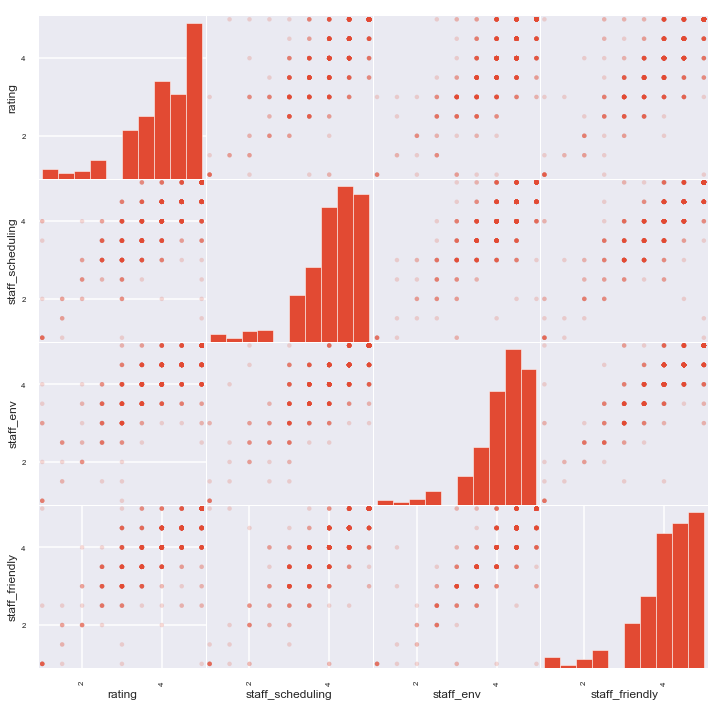

In [246]:
from pandas.plotting import scatter_matrix
scatter_matrix(scores.loc[:,['rating','staff_scheduling','staff_env', 'staff_friendly']], \
               alpha=0.2, figsize=(12, 12), diagonal='hist')